In [68]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#Question 1
#Reads in the file and splits into an nd array
#Index 0 is 1, 1 is -1
fileTxt = open("simple-food-reviews.txt", "r")
dictList = [dict() for x in range(2)]
x = np.arange(18)
vals = np.random.choice(x, 12, replace = False)
countPos = 0
countNeg = 0
testingData = np.array([])
for count, line in enumerate(fileTxt):
    if not(count in vals):
        line = line.rstrip("\n")
        testingData = np.append(testingData, line)
        continue
    line = line.rstrip("\n")
    line = line.rstrip('')
    lineSplit = line.split(" ")
    for i in lineSplit:
        if i == '-1' or i == '1' or len(i) < 3:
            continue
        else:
            temp = {}
            if lineSplit[0] == '1':
                countPos = countPos + 1
                if i in dictList[0]:
                    dictList[0][i] = dictList[0][i] + 1
                else:
                    dictList[0][i] = 1
            else:
                countNeg = countNeg + 1
                if i in dictList[1]:
                    dictList[1][i] = dictList[1][i] + 1
                else:
                    dictList[1][i] = 1

                    
#dictList contains the count of all of the words from the random 12 reviews, 
#with the first dict being the positive reviews, and the second one being the negative reviews
#countPos and countNeg have the count of the positive and negative reviews from the random sample
fileTxt.close()

In [46]:
#Using the vals array, test the predictions and create a confusion matrix using smoothing
for count, line in enumerate(testingData):
    lineSplit = np.array(line.split(" "))
    line = line.rstrip("\n")
    lineSplit = np.delete(lineSplit, 0)
    #We now have a trimmed and split review, next is to try predict whether it was pos or neg
    #Positive case
    temp = dictList[0]
    #We need P(Review|Positive)
    probPos = 1
    for key in temp:
        if key in lineSplit:
            probPos = (probPos)*((temp[key]+1)/(countPos+2))
        else:
            probPos = (probPos)*(1-((temp[key]+1)/(countPos+2)))
    #Negative case
    temp = dictList[1]
    probNeg = 1
    for key in temp:
        if key in lineSplit:
            probNeg = (probNeg)*((temp[key]+1)/(countNeg+2))
        else:
            probNeg = (probNeg)*(1-((temp[key]+1)/(countNeg+2)))
    #Calculate final probability its positive
    finalProbPos = (probPos*(countPos/12))/((probPos*(countPos/12)) + (probNeg*(countNeg/12)))
    if finalProbPos > 0.5:
        prediction = 1
        predictionPos = finalProbPos
    else:
        prediction = -1
        predictionPos = 1- finalProbPos
    print(line + " " + str(prediction) + " " + str(predictionPos))


1 this is a great restaurant -1 0.9798112261580674
1 what a lovely restaurant -1 0.9852986666956332
-1 the food tasted awful -1 0.8924657314172532
-1 this is a bad restaurant   1 0.6133870780732203
-1 avoid this restaurant -1 0.8739476387835183
-1 avoid the food 1 0.6437944757690598


In [35]:
#1c, same as previous cell but without laplace smoothing
#Using the vals array, test the predictions and create a confusion matrix using smoothing
for count, line in enumerate(testingData):
    lineSplit = np.array(line.split(" "))
    line = line.rstrip("\n")
    lineSplit = np.delete(lineSplit, 0)
    #We now have a trimmed and split review, next is to try predict whether it was pos or neg
    #Positive case
    temp = dictList[0]
    #We need P(Review|Positive)
    probPos = 1
    for key in temp:
        if key in lineSplit:
            probPos = (probPos)*((temp[key])/(countPos))
        else:
            probPos = (probPos)*(1-((temp[key])/(countPos)))
    #Negative case
    temp = dictList[1]
    probNeg = 1
    for key in temp:
        if key in lineSplit:
            probNeg = (probNeg)*((temp[key])/(countNeg))
        else:
            probNeg = (probNeg)*(1-((temp[key])/(countNeg)))
    #Calculate final probability its positive
    finalProbPos = (probPos*(countPos/12))/((probPos*(countPos/12)) + (probNeg*(countNeg/12)))
    if finalProbPos > 0.5:
        prediction = 1
        predictionPos = finalProbPos
    else:
        prediction = -1
        predictionPos = 1- finalProbPos
    print(line + " " + str(prediction) + " " + str(predictionPos))

1 i really enjoyed my food -1 0.9989172880511551
1 the service was great 1 0.9351211455261612
1 the food the service and the restaurant was great 1 0.9714291470923577
-1 this is a bad restaurant   1 0.9969455779348054
-1 the service and the food was terrible 1 0.9991779866204407
-1 avoid the food 1 0.9351211455261612


In [24]:
#1b, tringing on the full review set
#Index 0 is 1, 1 is -1
fileTxt = open("simple-food-reviews.txt", "r")
dictList = [dict() for x in range(2)]
x = np.arange(18)
countPos = 6
countNeg = 6
testingData = np.array([])
for count, line in enumerate(fileTxt):
    line = line.rstrip("\n")
    line = line.rstrip('')
    lineSplit = line.split(" ")
    for i in lineSplit:
        if i == '-1' or i == '1':
            continue
        else:
            temp = {}
            if lineSplit[0] == '1':
                if i in dictList[0]:
                    dictList[0][i] = dictList[0][i] + 1
                else:
                    dictList[0][i] = 1
            else:
                if i in dictList[1]:
                    dictList[1][i] = dictList[1][i] + 1
                else:
                    dictList[1][i] = 1

print(dictList)                    
#dictList contains the count of all of the words from the random 12 reviews, 
#with the first dict being the positive reviews, and the second one being the negative reviews
#countPos and countNeg have the count of the positive and negative reviews from the random sample
    

fileTxt.close()

[{'the': 7, 'food': 4, 'is': 2, 'lovely': 3, 'this': 1, 'a': 3, 'great': 4, 'restaurant': 4, 'i': 2, 'really': 1, 'enjoyed': 2, 'my': 2, 'experience': 1, 'at': 1, 'we': 1, 'had': 1, 'meal': 1, 'tasted': 1, 'service': 2, 'was': 2, 'what': 1, 'and': 1}, {'the': 7, 'service': 2, 'is': 2, 'terrible': 4, 'food': 4, 'tasted': 1, 'awful': 1, 'this': 2, 'a': 2, 'bad': 2, 'restaurant': 2, '': 2, 'was': 3, 'really': 1, 'and': 1, 'we': 1, 'had': 1, 'experience': 1, 'avoid': 2, 'meal': 1}]


In [31]:
#pulling in and testng on 2 of my own reviews

fileTxt = open("custom-food-reviews.txt", "r")

for count, line in enumerate(fileTxt):
    line = line.rstrip("\n")
    lineSplit = line.split(" ")
    lineSplit = np.delete(lineSplit, 0)
    #We now have a trimmed and split review, next is to try predict whether it was pos or neg
    #Positive case
    
    temp = dictList[0]
    probPos = 1
    for key in temp:
        if key in lineSplit:
            probPos = probPos*(temp[key] + 1)/(9)
        else:
            probPos = probPos*(1-((temp[key]+1)/9))
    #Negative Case
    temp = dictList[1]
    probNeg = 1
    for key in temp:
        if key in lineSplit:
            probNeg = probNeg*(temp[key] + 1)/(9)
        else:
            probNeg = probNeg*(1-((temp[key]+1)/9))
    #Calc final probability that is positive
    finalProbPos = (probPos*(0.5))/(probPos*0.5 + probNeg*0.5)
    
    if finalProbPos > 0.5:
        prediction = 1
        predictionPob = finalProbPos
    else:
        prediction = -1
        predictionPob = 1 - finalProbPos
    print(line + " " + str(prediction) + " " + str(predictionPob))

1 the food exceeded our expectations -1 0.7484599589322383
-1 the food and service was lackluster -1 0.8264134901516226


In [43]:
#Question 2
#Reading in csv

fileCsv = open("smalldigits.csv", "r")

vals = np.random.choice(np.arange(1797), 359, replace=False)
#Vals contains the indexes of the randomly chosen testing data
arr = np.zeros((1438, 65))
testingData = np.zeros((359, 65))
arrIndex = 0
testingIndex = 0
for count, line in enumerate(fileCsv):
    line = line.rstrip("\n")
    lineSplit = line.split(",")
    if count in vals:
        for index, val in enumerate(lineSplit):
            testingData[testingIndex, index] = val
        testingIndex = testingIndex + 1
    else:
        for index, val in enumerate(lineSplit):
            arr[arrIndex, index] = val
        arrIndex = arrIndex + 1
#File currently stored in arr
#Need to count occurances of each index for each digit, to get probability that pixel is coloured for random digit
dictList = [dict() for x in range(10)]
numCount = np.zeros(10)
#DictList has 10 dictionarys, one for each digit
#Will store each pixel accrding to its index

for i, row in enumerate(arr):
    num = int(row[-1])
    numCount[num] = numCount[num] + 1
    for i, col in enumerate(row):
        if i == len(row)-1:
            continue
        if i in dictList[num]:
            dictList[num][i] = dictList[num][i] + col
        else:
            dictList[num][i] = col
print("done")
#Now all the data is stored in an array of dicts in dictList, and the count of each number is in numCount
fileCsv.close()

done


In [64]:
#Now using testingData from the previous cell, test the data
countCorrect = np.zeros(10)
countIncorrect = np.zeros(10)
incorrectDict = {0:'', 1:'', 2:'', 3:'', 4:'', 5:'', 6:'', 7:'', 8:'', 9:''}
for count, row in enumerate(testingData):
    #For each row, calc the probability that its 1 to 9
    #probGuess stores the prbability of each num
    probGuess = np.ones(10)
    for guess in range(10):
        #P(row|guess)
        for index, col in enumerate(row):
            if index == len(row)-1:
                continue
            elif col == 0:
                probGuess[guess] = probGuess[guess]*(1-(dictList[guess][index] + 1)/(numCount[guess] + 2))
            elif col == 1:
                probGuess[guess]*((dictList[guess][index] + 1)/(numCount[guess] + 2))
            else:
                print("Not 0 or 1, something broke")
    probPredict = np.ones(10)
    #denominator is always constant, so find it here:
    denom = 0
    for i in range(10):
        denom = denom + (probGuess[i]*(numCount[i]/1438))
    for predict in range(10):
        probPredict[predict] = probGuess[predict]*(numCount[predict]/1438)
    prediction = np.where(probPredict == np.amax(probPredict))
    if(prediction[0] == 1):
        print(str(count) + "\t" + str(row[-1]))
    #Our prediction of the number is now stored in prediction[0]
    #Calc confusion matrix
    if prediction[0] == row[-1]:
        countCorrect[int(prediction[0])] = countCorrect[int(prediction[0])] + 1
    else:
        incorrectDict[int(prediction[0])] = incorrectDict[int(prediction[0])] + str(row[-1]) + ','
        countIncorrect[int(prediction[0])] = countIncorrect[int(prediction[0])] + 1
print("Correct classifications:")
print(countCorrect)
print("Incorrect classifications:")
print(countIncorrect)
for i in range(10):
    print(i, end=': ')
    for j in range(10):
        incs = incorrectDict[i]
        print(str(j) + "|" + str(incs.count(str(float(j)))))

7	2.0
13	1.0
21	8.0
32	1.0
35	4.0
36	8.0
61	1.0
77	1.0
81	1.0
87	1.0
90	1.0
110	1.0
112	8.0
119	8.0
122	1.0
126	9.0
128	1.0
139	9.0
144	1.0
151	1.0
156	8.0
157	1.0
158	8.0
168	1.0
170	1.0
173	1.0
181	8.0
182	8.0
194	1.0
211	1.0
216	1.0
219	1.0
220	1.0
225	1.0
238	1.0
240	1.0
244	1.0
257	8.0
261	1.0
263	1.0
266	1.0
270	8.0
271	8.0
273	8.0
276	1.0
291	1.0
293	1.0
302	3.0
305	1.0
314	8.0
319	8.0
323	1.0
335	1.0
336	3.0
338	8.0
347	1.0
351	1.0
356	8.0
357	8.0
Correct classifications:
[33. 36. 34. 25. 34. 32. 32. 35. 12. 24.]
Incorrect classifications:
[ 0. 23.  3. 13.  1.  3.  3. 10.  0.  6.]
0: 0|0
1|0
2|0
3|0
4|0
5|0
6|0
7|0
8|0
9|0
1: 0|0
1|0
2|1
3|2
4|1
5|0
6|0
7|0
8|17
9|2
2: 0|0
1|2
2|0
3|0
4|0
5|0
6|0
7|0
8|1
9|0
3: 0|0
1|0
2|3
3|0
4|0
5|0
6|0
7|0
8|5
9|5
4: 0|0
1|0
2|0
3|0
4|0
5|0
6|1
7|0
8|0
9|0
5: 0|0
1|1
2|0
3|0
4|0
5|0
6|0
7|0
8|1
9|1
6: 0|1
1|0
2|0
3|0
4|0
5|0
6|0
7|0
8|2
9|0
7: 0|0
1|0
2|2
3|2
4|1
5|0
6|0
7|0
8|2
9|3
8: 0|0
1|0
2|0
3|0
4|0
5|0
6|0
7|0
8|0
9|0
9: 0|0
1|1
2|0
3

In [63]:
print(sum(countCorrect))
print(sum(countCorrect) + sum(countIncorrect))
print(297/359)

297.0
359.0
0.8272980501392758


variance;skewness;curtosis;entropy;class



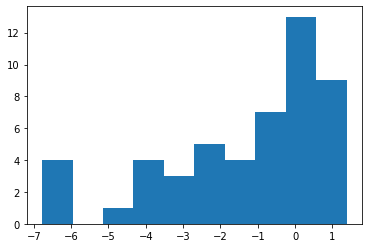

In [107]:
#Question 3

fileCsv = open("banknote_authentication.csv", "r")
varianceArr = np.array([])
skewnessArr = np.array([])
curtosisArr = np.array([])
entropyArr = np.array([])
classArr = np.array([])

arr = np.zeros((100, 5))

classes = fileCsv.readline()
print(classes)

for count,line in enumerate(fileCsv):
    line = line.rstrip('\n')
    lineSplit = line.split(';')
    for index, val in enumerate(lineSplit):
        arr[count, index] = val

#arr contains all the data, in the same order as in the csv file

fileCsv.close()

In [ ]:
#Traning the model
